# homework1-zhanglulu-1701110221

# QUESTION1

## a&b.

### repetition of the K-S test analysis in Schaefer (2008) to test the code I write

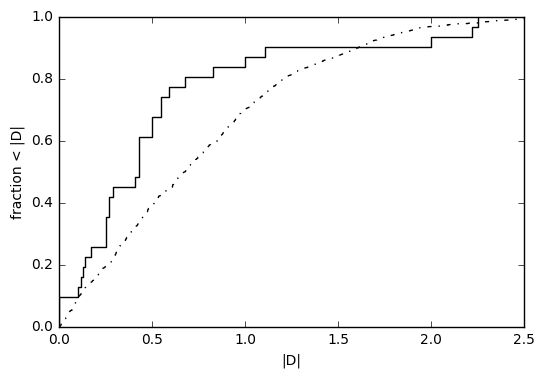

maximum of |D|:0.33
P-value       :0.0023


In [73]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
import powerlaw as pl
from scipy.stats import ks_2samp

#read the abs(D) data coped from Schaefer (2008).
data = ascii.read('c:/users/a/desktop/distance/homework1/DD.txt')

D = data['absD']

#construct a distribution of Gaussian errors and get its absolute value.
mu, sigma = 0, 1 
s = np.abs(np.random.normal(mu, sigma, 1000))

#plot the D&s's cumulative distribution function as in the Schaefer (2008).
#by the powerlaw.cdf() function. reference: https://pypi.python.org/pypi/powerlaw
cdf = pl.cdf(D)
scdf = pl.cdf(s)

#for I find that powerlaw.cdf() just return the lower value  at the step line, so to get the step plotting 
#as in the Schaefer (2008) but not a oblique line,I add the higher value at the step line into the return array
#the code to add the higher value at the step line into the return array and save them in variable 'edf'
edf = np.array([[cdf[0][0],cdf[0][0]],[cdf[1][0],cdf[1][1]]])
for i in range(1,len(cdf[0])-1):
    edf = np.hstack((edf,np.array([[cdf[0][i]],[cdf[1][i]]])))
    edf = np.hstack((edf,np.array([[cdf[0][i]],[cdf[1][i+1]]])))
edf = np.hstack((edf,np.array([[cdf[0][len(cdf[0])-1],cdf[0][len(cdf[0])-1]],[cdf[1][len(cdf[0])-1],1]])))

#plot the data
plt.plot(edf[0],edf[1],'k-')
plt.plot(scdf[0],scdf[1],'k-.')

#set the figure form and label to make it consist with the paper
plt.xlim(0,2.5)

plt.xlabel('|D|')
plt.ylabel('fraction < |D|')
plt.show()

#K-S test of abs(D)&abs(s) by scipy ks_2samp()
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html
#The online K-S test I found: http://www.physics.csbsju.edu/stats/KS-test.n.plot_form.html
test_stat = ks_2samp(D, s)
print('maximum of |D|:%4.2f'%(test_stat[0]))
print('P-value       :%6.4f'%(test_stat[1]))

We can find that the code just get the consistend plotting and consequence as Schaefer (2008), the difference in corresponding value is just for that its value depends on the number and value of the random Guassian errors that generated by the code.

As a whole, the code above is sufficient to the question in our homework.

### K-S test for the data in our question

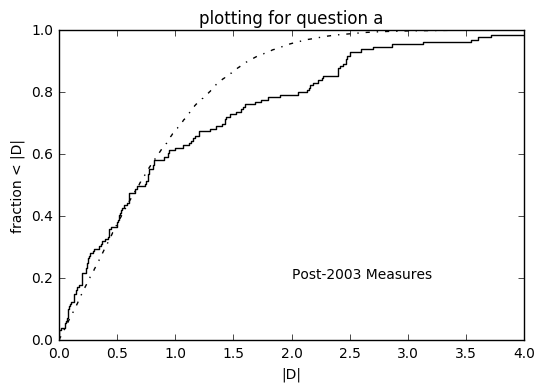

maximum of |D|:0.17
P-value       :0.0010


In [92]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
import powerlaw as pl
from scipy.stats import ks_2samp

#get the abs(D) as in the Schaefer (2008).
#the abs(D) include the data after Eisenhauer et al.(2003) that saved in GALA_D.txt 
data = ascii.read('c:/users/a/desktop/distance/homework1/GALA_D.txt')
Rs2 = 7.94  #the benchmark taken from  Eisenhauer et al.(2003)
R0 = data['R0']
stat = data['Stat']
syst = data['Syst']
D = np.abs((R0-Rs2)/(stat+syst))
#I'm not sure determine the total sigma by (stat+syst) is right or not,
#but the sqrt(stat^2+syst^2) will result in the same conclusion as described under the below plotting.

#construct a distribution of Gaussian errors and get its absolute value.
mu, sigma = 0, 1 
s = np.abs(np.random.normal(mu, sigma, 10000))

#plot the D&s's cumulative distribution function as above
cdf = pl.cdf(D)
scdf = pl.cdf(s)

edf = np.array([[cdf[0][0],cdf[0][0]],[cdf[1][0],cdf[1][1]]])
for i in range(1,len(cdf[0])-1):
    edf = np.hstack((edf,np.array([[cdf[0][i]],[cdf[1][i]]])))
    edf = np.hstack((edf,np.array([[cdf[0][i]],[cdf[1][i+1]]])))
edf = np.hstack((edf,np.array([[cdf[0][len(cdf[0])-1],cdf[0][len(cdf[0])-1]],[cdf[1][len(cdf[0])-1],1]])))

plt.plot(edf[0],edf[1],'k-')
plt.plot(scdf[0],scdf[1],'k-.')

plt.title('plotting for question a')
plt.text(2.0,0.2,'Post-2003 Measures',)
plt.xlim(0,4)
plt.xlabel('|D|')
plt.ylabel('fraction < |D|')
plt.show()

#K-S test of abs(D)&abs(s) by scipy ks_2samp()
test_stat = ks_2samp(D, s)
print('maximum of |D|:%4.2f'%(test_stat[0]))
print('P-value       :%6.4f'%(test_stat[1]))

As for question b, from above calculated value of maximum of |D| and P-value, we can get similar conclusion as in Schaefer (2008) that the observed distribution does not match the model at $3\sigma$ level. Yet the difference is that though the CDF of |D| shows a slight trend of concentration at |D|< 0.5,the data show a much obvious dispersion at |D|> 1.0. Assumed that the benchmark taken from  Eisenhauer et al.(2003) is the right distance measured to the centre of our Milky Way, the published $\sigma$ values should be systematically too small.

Otherwise, according to the $R_{0}^{IAU} = 8.5 kpc$ that the International-Astronomical-Union-recommended Galactic Center distance and $R_{0} = 8.3 + 0.2 (statistical) + 0.4 (systematic) kpc$ in de Grijs, R., & Bono, G. 2016,AJ,5,19(Paper IV),there is another possibility that if the published $\sigma$ values be restricted right the benchmark taken from  Eisenhauer et al.(2003) may be not so right.

Or both of the benchmark and the published $\sigma$ values need modification. 

### c

To determine whether there are any systematic differences among the mean distances derived for different distance tracers, I firstly choose the data from 90s to nowadays of different distance tracers and make a gaussian fitting of which has more than 12 data in it(I think too few data will leads to a bad fitting).

As shown below,data derived for different distance tracers show a difference in the mean distances(marked as the vertical black dashed),but one thing needs to notice is that the much of the number that the data has, the smaller the difference are.

Besides,I take a gaussian fitting of the distribution of the mean distances derived for all different distance tracers use the data from 90s to nowadays.The standard deviation I get of the mean distances by function numpy.std() is 0.35,and the fitting result is 0.34.

The fitting in code is by the least square fitting module in python.

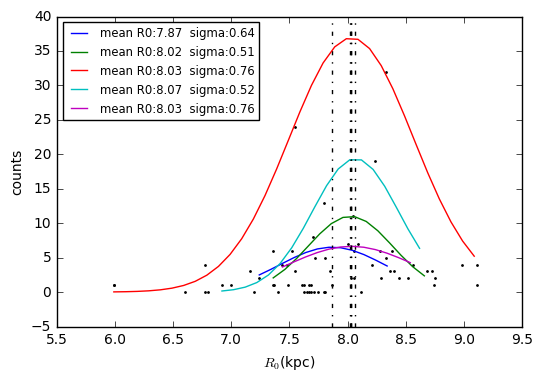

In [154]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

#define thefunction that need in the lwast square fitting
#reference: https://pythonhosted.org/algopy/examples/leastsquaresfitting.html
def func(x,p):
    a,b,c =p
    val = a * np.exp(-(x - b)**2 / c**2)
    return val

def residuals(p, y, x):
    return y-func(x, p)

def gaussian(x, a, b, c):
    val = a * np.exp(-(x - b)**2 / c**2)
    return val

file = open('c:/users/a/desktop/distance/homework1/GALA_D_trace.txt')
dat = file.readlines()
file.close()
num = np.array([])
n = 0
#** important step to get the index that split the data in the document according to  different tracers
for i in range(0,len(dat)):
    if (dat[i][0] == '#'):
        n = n+1
        num = np.hstack((num,i-n))
num = np.hstack((num,len(dat)))
num = num.astype(np.int)

data = ascii.read('c:/users/a/desktop/distance/homework1/GALA_D_trace.txt')

for i in range(0,len(num)-1):
#plot the hist of Ro of different traces to get their distribution
    plt.figure()
    n = plt.hist(data['R0'][num[i]:num[i+1]-1],bins=5)
    plt.close()
#    plt.figure()
    x = n[1][:len(n[1])-1]+(n[1][1]-n[1][0])/2
    y = n[0]
#use the distrubition information that returned from the hist() function to draw it by scatter diagram
#in order to take the gaussian fitting.
    plt.scatter(x, y,c='k',s=1)
    if (np.sum(y)>12):#make a gaussian fitting of which has more than 12 data in it
        #make the initial value of parameters in gaussian fitting.
        a = np.max(y)
        u = np.mean(data['R0'][num[i]:num[i+1]-1])
        sig = np.mean(data['Stat'][num[i]:num[i+1]-1])+np.mean(data['Syst'][num[i]:num[i+1]-1]) 
        p0 = [a,u,sig] #ini para
        plsq = leastsq(residuals, p0, args=(y,x))#fitting by leastsp() function
        #use the fitting result to draw the fitting gaussian function
        a,u,sig = plsq[0]
        xx = np.arange(np.min(x),np.max(x),0.1)
        yy = gaussian(xx, a, u, sig)
        plt.plot(xx,yy,label='mean R0:%4.2f  sigma:%4.2f'%(u,sig))
        plt.xlabel('$R_{0}$(kpc)')
        plt.ylabel('counts')
        plt.axvline(u,c='k',ls='-.')
#        print('mean R0:%4.2f  sigma:%4.2f'%(u,sig))

plt.legend(loc=2,fontsize = 'small')
plt.show()

std of mean:0.35


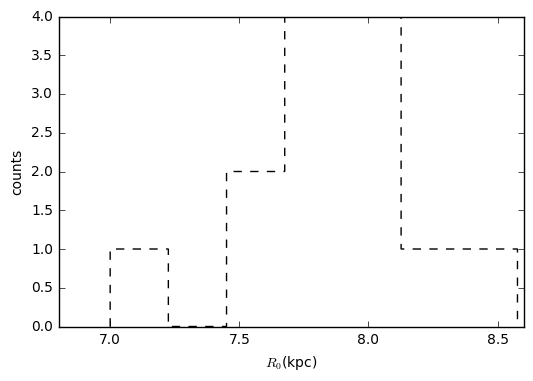

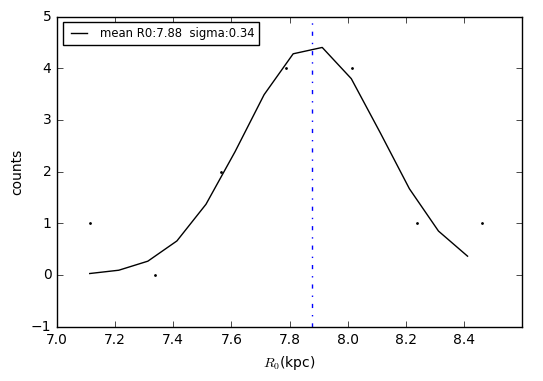

In [153]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

def func(x,p):
    a,b,c =p
    val = a * np.exp(-(x - b)**2 / c**2)
    return val

def residuals(p, y, x):
    return y-func(x, p)

def gaussian(x, a, b, c):
    val = a * np.exp(-(x - b)**2 / c**2)
    return val

file = open('c:/users/a/desktop/distance/homework1/GALA_D_trace.txt')
dat = file.readlines()
file.close()
num = np.array([])
n = 0
for i in range(0,len(dat)):
    if (dat[i][0] == '#'):
        n = n+1
        num = np.hstack((num,i-n))
num = np.hstack((num,len(dat)))
num = num.astype(np.int)

data = ascii.read('c:/users/a/desktop/distance/homework1/GALA_D_trace.txt')

mean = np.array([])
for i in range(0,len(num)-1):
    mean = np.hstack((mean,np.mean(data['R0'][num[i]:num[i+1]-1])))
print('std of mean:%4.2f'%np.std(mean))

plt.figure()
n = plt.hist(mean,bins=7,histtype ='step',color='k',ls='--')
plt.xlabel('$R_{0}$(kpc)')
plt.ylabel('counts')

x = n[1][:len(n[1])-1]+(n[1][1]-n[1][0])/2
y = n[0]

plt.figure()
plt.scatter(x, y,c='k',s=1)
a = np.max(y)
u = np.mean(data['R0'][num[i]:num[i+1]-1])
sig = np.std(mean)
p0 = [a,u,sig] #ini para
plsq = leastsq(residuals, p0, args=(y,x))
a,u,sig = plsq[0]
xx = np.arange(np.min(x),np.max(x),0.1)
yy = gaussian(xx, a, u, sig)
plt.plot(xx,yy,'k',label='mean R0:%4.2f  sigma:%4.2f'%(u,sig))
plt.xlabel('$R_{0}$(kpc)')
plt.ylabel('counts')
plt.axvline(u,c='b',ls='-.')

plt.legend(loc=2,fontsize = 'small')
plt.show()